In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# **Processing Dataset**
---



In [ ]:
import os
path='/content/drive/MyDrive/Project/CtCov/Covid/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="covid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

path='/content/drive/MyDrive/Project/CtCov/Normal/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="noncovid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

In [ ]:
# Initiate base directory
base_dir = '/content/drive/MyDrive/Project/'
if(os.path.isdir(base_dir)!=True):
  os.mkdir(base_dir)

In [ ]:
# Create directories
train_dir = os.path.join(base_dir, 'train')
if(os.path.isdir(train_dir)!=True):
  os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if(os.path.isdir(validation_dir)!=True):
  os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if(os.path.isdir(test_dir)!=True):
  os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'covid')
if(os.path.isdir(train_covid_dir)!=True):
  os.mkdir(train_covid_dir)

train_noncovid_dir = os.path.join(train_dir, 'noncovid')
if(os.path.isdir(train_noncovid_dir)!=True):
  os.mkdir(train_noncovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'covid')
if(os.path.isdir(validation_covid_dir)!=True):
  os.mkdir(validation_covid_dir)

validation_noncovid_dir = os.path.join(validation_dir, 'noncovid')
if(os.path.isdir(validation_noncovid_dir)!=True):
  os.mkdir(validation_noncovid_dir)

test_covid_dir = os.path.join(test_dir, 'covid')
if(os.path.isdir(test_covid_dir)!=True):
  os.mkdir(test_covid_dir)

test_noncovid_dir = os.path.join(test_dir, 'noncovid')
if(os.path.isdir(test_noncovid_dir)!=True):
  os.mkdir(test_noncovid_dir)

In [ ]:
original_dataset_dir_covid = '/content/drive/MyDrive/Project/CtCov/Covid/'
original_dataset_dir_non_covid = '/content/drive/MyDrive/Project/CtCov/Normal/'

import shutil
fnames = ['covid{}.png'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid{}.png'.format(i) for i in range(1000, 1129)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid{}.png'.format(i) for i in range(1129, 1229)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(1000, 1129)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(1129, 1229)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_noncovid_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training Covid images:', len(os.listdir(train_covid_dir)))
print('total training NonCovid images:', len(os.listdir(train_noncovid_dir)))

print('total validation Covid images:', len(os.listdir(validation_covid_dir)))
print('total validation NonCovid images:', len(os.listdir(validation_noncovid_dir)))

print('total test Covid images:', len(os.listdir(test_covid_dir)))
print('total test NonCovid images:', len(os.listdir(test_noncovid_dir)))

total training Covid images: 1000
total training NonCovid images: 1000
total validation Covid images: 129
total validation NonCovid images: 129
total test Covid images: 100
total test NonCovid images: 100


# **Simple CNN from Keras**
---

In [ ]:
# Create and Compile the Model
from keras import layers
from keras import models
import tensorflow as tf

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 258 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
#model=None

In [ ]:
# Fit the model 
history = model.fit_generator(train_generator,
                              steps_per_epoch=15,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
15/15 [==============================] - 23s 1s/step - loss: 0.7032 - acc: 0.5567 - val_loss: 0.6895 - val_acc: 0.4900
Epoch 2/20
15/15 [==============================] - 21s 1s/step - loss: 0.6784 - acc: 0.5633 - val_loss: 0.6746 - val_acc: 0.4950
Epoch 3/20
15/15 [==============================] - 20s 1s/step - loss: 0.6617 - acc: 0.6267 - val_loss: 0.7734 - val_acc: 0.4250
Epoch 4/20
15/15 [==============================] - 21s 1s/step - loss: 0.6573 - acc: 0.6267 - val_loss: 0.6067 - val_acc: 0.7550
Epoch 5/20
15/15 [==============================] - 21s 1s/step - loss: 0.6291 - acc: 0.6767 - val_loss: 0.5906 - val_acc: 0.6000
Epoch 6/20
15/15 [==============================] - 21s 1s/step - loss: 0.6059 - acc: 0.6767 - val_loss: 0.5150 - val_acc: 0.7800
Epoch 7/20
15/15 [==============================] - 21s 1s/step - loss: 0.6039 - acc: 0.6567 - val_loss: 0.5296 - val_acc: 0.7950
Epoch 8/20
15/15 [==============================] - 21s 1s/step - loss: 0.5486 - acc: 0.71

In [ ]:
print(history.history.keys())
print(history.history['val_acc'][-1])

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
0.7850000262260437


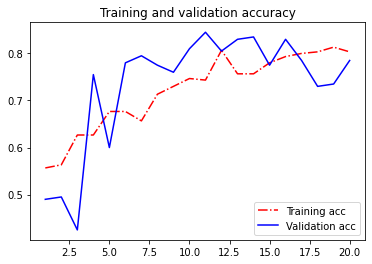

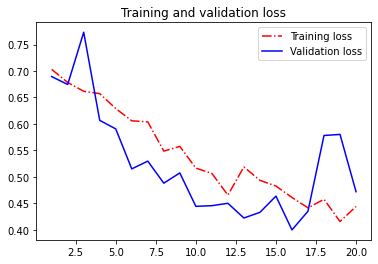

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r-.', label='Training acc')
#plt.plot(epochs, acc, 'go')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
#plt.plot(epochs, val_acc, 'bo')
plt.title('Training and validation accuracy')
plt.legend()

plt.savefig('/content/drive/MyDrive/Project/NormalCnnAcc.png',dpi=700)
plt.show()

plt.plot(epochs, loss, 'r-.', label='Training loss')
#plt.plot(epochs, loss, 'ro')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
#plt.plot(epochs, val_loss, 'bo')
plt.title('Training and validation loss')
plt.legend()

plt.savefig('/content/drive/MyDrive/Project/NormalCnnLoss.png',dpi=700)
plt.show()

In [ ]:
model.evaluate(test_generator)

20/20 [==============================] - 4s 186ms/step - loss: 0.6670 - acc: 0.6950


[0.6670490503311157, 0.6949999928474426]

# **Using DropOut and Pic Augmentatition**
---


In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
model1=None

In [ ]:
train_dir

'/content/drive/MyDrive/Project/train'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=5,
                                                        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 258 images belonging to 2 classes.


In [ ]:
history1 = model1.fit_generator(train_generator,
                              steps_per_epoch=20,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
20/20 [==============================] - 17s 731ms/step - loss: 0.6969 - acc: 0.5200 - val_loss: 0.6843 - val_acc: 0.5400
Epoch 2/30
20/20 [==============================] - 15s 727ms/step - loss: 0.6933 - acc: 0.5200 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 3/30
20/20 [==============================] - 14s 717ms/step - loss: 0.6909 - acc: 0.5650 - val_loss: 0.6822 - val_acc: 0.4800
Epoch 4/30
20/20 [==============================] - 15s 734ms/step - loss: 0.6838 - acc: 0.5850 - val_loss: 0.7075 - val_acc: 0.4700
Epoch 5/30
20/20 [==============================] - 14s 708ms/step - loss: 0.7010 - acc: 0.4900 - val_loss: 0.6817 - val_acc: 0.5300
Epoch 6/30
20/20 [==============================] - 14s 719ms/step - loss: 0.6962 - acc: 0.5100 - val_loss: 0.6764 - val_acc: 0.7000
Epoch 7/30
20/20 [==============================] - 15s 745ms/step - loss: 0.6931 - acc: 0.5050 - val_loss: 0.6803 - val_acc: 0.5100
Epoch 8/30
20/20 [==============================] - 15s 740ms/step - 

In [ ]:
model1.compile(loss='mse', optimizer='RMSprop', metrics=['acc'])

print(history1.history.keys())
print(history1.history['val_acc'][-1])

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
0.5899999737739563


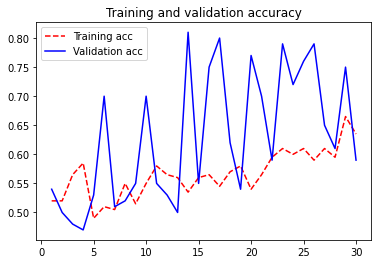

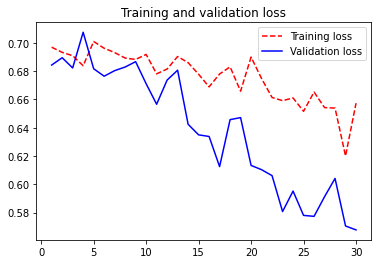

In [ ]:

import matplotlib.pyplot as plt

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **VGG16**

---



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [ ]:
train_path  = '/content/drive/MyDrive/Project/train'
valid_path  = '/content/drive/MyDrive/Project/validation'
test_path   = '/content/drive/MyDrive/Project/test'

In [ ]:
train_path

'/content/drive/MyDrive/Project/train'

In [ ]:
class_type = {0:'Covid',  1 : 'Normal'}

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [ ]:
vgg = VGG16( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

In [ ]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model_vgg = Model(vgg.input, x)

In [ ]:
model_vgg.summary()

In [ ]:
model_vgg.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input ,
                                    zoom_range= 0.2,
                                    horizontal_flip= True,
                                    shear_range= 0.2 ,
                                    rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path ,
                                           batch_size=5,
                                           target_size=(224,224))

Found 2000 images belonging to 2 classes.


In [ ]:
train.class_indices

{'covid': 0, 'noncovid': 1}

In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input ,
                                         rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= valid_path ,
                                                batch_size=5,
                                                target_size=(224,224))

Found 258 images belonging to 2 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input,
                                   rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path,
                                          target_size=(224,224),
                                          batch_size=5,
                                          shuffle= False)

Found 200 images belonging to 2 classes.


In [ ]:
hist = model_vgg.fit(train,
                 steps_per_epoch= 5,
                 epochs= 8,
                 validation_data= valid ,
                 validation_steps= 5)

"""hist = model.fit_generator(train, steps_per_epoch= 10,
                           epochs= 15,
                           validation_data= valid ,
                           validation_steps= 32,
                           callbacks=[es,mc])"""

Epoch 1/8
5/5 [==============================] - 31s 7s/step - loss: 1.5384 - accuracy: 0.4000 - val_loss: 0.5247 - val_accuracy: 0.7200
Epoch 2/8
5/5 [==============================] - 31s 7s/step - loss: 1.1866 - accuracy: 0.5200 - val_loss: 0.5254 - val_accuracy: 0.7200
Epoch 3/8
5/5 [==============================] - 27s 6s/step - loss: 0.6747 - accuracy: 0.7200 - val_loss: 0.6137 - val_accuracy: 0.6400
Epoch 4/8
5/5 [==============================] - 28s 6s/step - loss: 0.7150 - accuracy: 0.6800 - val_loss: 0.2334 - val_accuracy: 0.9600
Epoch 5/8
5/5 [==============================] - 28s 6s/step - loss: 0.9365 - accuracy: 0.4000 - val_loss: 0.4224 - val_accuracy: 0.8000
Epoch 6/8
5/5 [==============================] - 27s 6s/step - loss: 0.5141 - accuracy: 0.7600 - val_loss: 0.3133 - val_accuracy: 0.8800
Epoch 7/8
5/5 [==============================] - 27s 6s/step - loss: 0.5115 - accuracy: 0.8000 - val_loss: 0.3695 - val_accuracy: 0.8400
Epoch 8/8
5/5 [==========================

'hist = model.fit_generator(train, steps_per_epoch= 10,\n                           epochs= 15,\n                           validation_data= valid ,\n                           validation_steps= 32,\n                           callbacks=[es,mc])'

In [ ]:
model_vgg.compile(loss='mse', optimizer='RMSprop', metrics=['acc'])

history_dict = hist.history
print(hist.history.keys())
print(hist.history['val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.7200000286102295, 0.7200000286102295, 0.6399999856948853, 0.9599999785423279, 0.800000011920929, 0.8799999952316284, 0.8399999737739563, 0.8799999952316284]


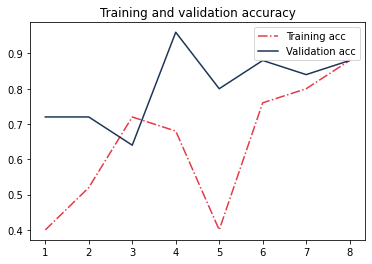

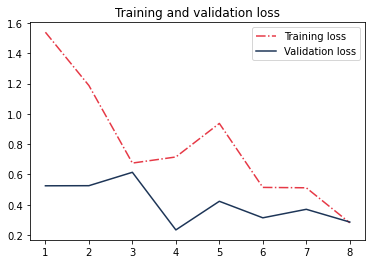

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,linestyle='-.',color='#e63946', label='Training acc')
#plt.plot(epochs, acc, 'ro')
plt.plot(epochs, val_acc, linestyle='-',color='#1d3557', label='Validation acc')
#plt.plot(epochs, val_acc, 'bo')
plt.title('Training and validation accuracy')
plt.legend()

plt.savefig('/content/drive/MyDrive/Project/Vgg16CnnAcc.png',dpi=700)
plt.show()

plt.plot(epochs, loss, linestyle='-.',color='#e63946', label='Training loss')
plt.plot(epochs, val_loss, linestyle='-',color='#1d3557', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.savefig('/content/drive/MyDrive/Project/Vgg16CnnLoss.png',dpi=700)
plt.show()

In [ ]:
model_vgg.evaluate_generator(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.4823921322822571, 0.5149999856948853]

# **Resnet50**

---



In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D


In [ ]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [ ]:
class_type = {0:'Covid',  1 : 'Normal'}

In [ ]:
res = ResNet50( input_shape=(224,224,3), include_top= False)

In [ ]:
for layer in res.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model_res = Model(res.input, x)
model_res.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_res.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           batch_size=15,
                                           target_size=(224,224))

validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path,
                                                batch_size=8,
                                                target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 258 images belonging to 2 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 200 images belonging to 2 classes.


In [ ]:
hist_res = model_res.fit_generator(train, 
                           steps_per_epoch= 10,
                           epochs= 20, 
                           validation_data= valid , 
                           validation_steps= 16) 
                           #callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
10/10 [==============================] - 58s 6s/step - loss: 11.2860 - accuracy: 0.5533 - val_loss: 9.7523 - val_accuracy: 0.6094
Epoch 2/20
10/10 [==============================] - 52s 5s/step - loss: 4.6908 - accuracy: 0.8000 - val_loss: 7.3687 - val_accuracy: 0.6719
Epoch 3/20
10/10 [==============================] - 50s 5s/step - loss: 4.6062 - accuracy: 0.7933 - val_loss: 5.2731 - val_accuracy: 0.7734
Epoch 4/20
10/10 [==============================] - 51s 5s/step - loss: 3.3140 - accuracy: 0.8467 - val_loss: 3.2652 - val_accuracy: 0.8125
Epoch 5/20
10/10 [==============================] - 51s 5s/step - loss: 3.7414 - accuracy: 0.8600 - val_loss: 3.7743 - val_accuracy: 0.8125
Epoch 6/20
10/10 [==============================] - 50s 5s/step - loss: 1.4725 - accuracy: 0.9067 - val_loss: 3.2931 - val_accuracy: 0.8281
Epoch 7/20
10/10 [==============================] - 51s 5s/step - loss: 2.6894 - accuracy: 0.8400 - val_loss: 2.4308 - val_accuracy: 0.7891
Epoch 8/20
10/10 [=

In [ ]:
h = hist_res.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

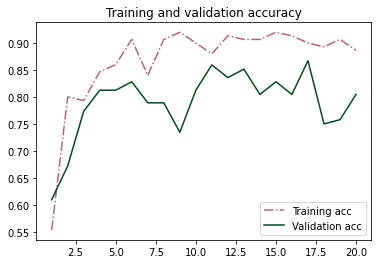

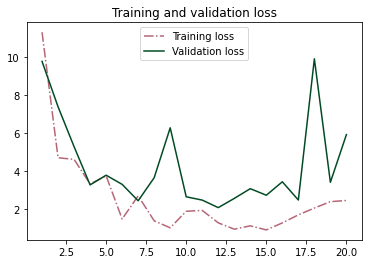

In [ ]:
import matplotlib.pyplot as plt

acc = hist_res.history['accuracy']
val_acc = hist_res.history['val_accuracy']
loss = hist_res.history['loss']
val_loss = hist_res.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,linestyle='-.',color='#b56576', label='Training acc')
#plt.plot(epochs, acc, 'ro')
plt.plot(epochs, val_acc, linestyle='-',color='#004b23', label='Validation acc')
#plt.plot(epochs, val_acc, 'bo')
plt.title('Training and validation accuracy')
plt.legend()

plt.savefig('/content/drive/MyDrive/Project/ResnetAcc.png',dpi=700)
plt.show()

plt.plot(epochs, loss, linestyle='-.',color='#b56576', label='Training loss')
plt.plot(epochs, val_loss, linestyle='-',color='#004b23', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.savefig('/content/drive/MyDrive/Project/ResnetLoss.png',dpi=700)
plt.show()

In [ ]:
model.evaluate(test)

7/7 [==============================] - 37s 5s/step - loss: 17.5182 - accuracy: 0.6050


[17.518171310424805, 0.6050000190734863]